# Mapping data with Tangram
- The notebook introduces to mapping single cell data on spatial data by using Tangram.
- The notebook uses data from **mouse brain cortex**, although different than those adopted in the manuscript.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import torch

In [2]:
# add path of Tangram repository for importing it
sys.path.append("./Tangram") 
import tangram as tg

***
#### Download the data

In [3]:
# !wget https://storage.googleapis.com/tommaso-brain-data/tangram_demo/mop_sn_tutorial.h5ad.gz -O data/mop_sn_tutorial.h5ad.gz
# !wget https://storage.googleapis.com/tommaso-brain-data/tangram_demo/slideseq_MOp_1217.h5ad.gz -O data/slideseq_MOp_1217.h5ad.gz
# !wget https://storage.googleapis.com/tommaso-brain-data/tangram_demo/MOp_markers.csv -O data/MOp_markers.csv
# !gunzip -f data/mop_sn_tutorial.h5ad.gz
# !gunzip -f data/slideseq_MOp_1217.h5ad.gz

Data links if not using wget:
- snRNA-seq datasets collected from adult mouse cortex:  [10Xv3 MOp](https://storage.googleapis.com/tommaso-brain-data/tangram_demo/mop_sn_tutorial.h5ad.gz).
- For spatial data, we will use one coronal slice of [Slide-seq2 data](
https://storage.googleapis.com/tommaso-brain-data/tangram_demo/slideseq_MOp_1217.h5ad.gz) (adult mouse brain; MOp area).
- We will map them via a few hundred [marker genes](https://storage.googleapis.com/tommaso-brain-data/tangram_demo/MOp_markers.csv), found in [literature](https://www.biorxiv.org/content/10.1101/2020.06.04.105700v1).
- All datasets need to be unzipped: resulting `h5ad` and `csv` files should be placed in the `data` folder.

***
#### Load spatial data
- Spatial data need to be organized as a voxel-by-gene matrix. Here, Slide-seq data contains 9852 spatial voxels, in each of which there are 24518 genes measured.

In [4]:
path = os.path.join('data', 'slideseq_MOp_1217.h5ad')
ad_sp = sc.read_h5ad(path)
ad_sp

AnnData object with n_obs × n_vars = 9852 × 24518
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'x', 'y'

In [5]:
ad_sp.obs

,orig.ident,nCount_RNA,nFeature_RNA,x,y
ACCGGAACTTCTTC,0,14520.0,5453,3259.4,1233.7
GGGGGGGGGGGGGG,0,22554.0,8660,1662.6,2097.6
AAAGACCCAAAGGC,0,10774.0,4411,3050.3,1637.6
TCGGCGGTATCATT,0,10581.0,4033,1389.3,2045.8
TACGCCGGTACTGG,0,11075.0,4266,3022.8,1768.0
...,...,...,...,...,...
CAGTTGTGGAGCAG,0,10.0,10,1803.7,2009.3
ACTATGGTGTATCA,0,10.0,10,3538.7,1950.0
CACCCCCTAGAAAT,0,10.0,10,2004.3,2032.4
AAAGAATACGTACC,0,10.0,10,2161.3,2868.3


In [6]:
ad_sp.var

""
features
0610005C13Rik
0610007P14Rik
0610009B22Rik
0610009E02Rik
0610009L18Rik
...
n-R5s33
n-R5s40
n-R5s88


In [7]:
ad_sp.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

- The voxel coordinates are saved in the fields `obs.x` and `obs.y` which we can use to visualize the spatial ROI. Each "dot" is the center of a 10um voxel.

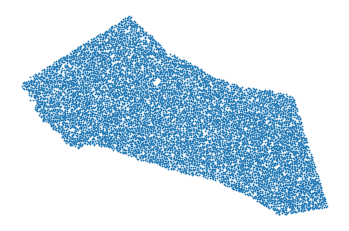

In [8]:
xs = ad_sp.obs.x.values
ys = ad_sp.obs.y.values
plt.axis('off')
plt.scatter(xs, ys, s=.7)

***
#### Single cell data

- By single cell data, we generally mean either scRNAseq or snRNAseq.
- We start by mapping the MOp 10Xv3 dataset, which contains single nuclei collected from a posterior region of the primary motor cortex.
- They are approximately 53k profiled cells with 28k genes.

In [9]:
path = os.path.join('data', 'mop_sn_tutorial.h5ad')
ad_sc = sc.read_h5ad(path)
ad_sc

AnnData object with n_obs × n_vars = 26431 × 27742
    obs: 'QC', 'batch', 'class_color', 'class_id', 'class_label', 'cluster_color', 'cluster_labels', 'dataset', 'date', 'ident', 'individual', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'project', 'region', 'species', 'subclass_id', 'subclass_label'
    layers: 'logcounts'

In [10]:
ad_sc.obs

,QC,batch,class_color,class_id,class_label,cluster_color,cluster_labels,dataset,date,ident,individual,nCount_RNA,nFeature_RNA,nGene,nUMI,project,region,species,subclass_id,subclass_label
index,,,,,,,,,,,,,,,,,,,,
pBICCNsMMrMOpRPiM004d190318_CATTGCCGTGAGAGGG-4,PassQC,4,#00ADEE,2,Glutamatergic,#2EB934,L2/3 IT_3,2,190318_CATTGCCGTGAGAGGG,60,M004,15189.0,4816,3439,8522.0,BICCN,MOpRP,MM,7,L2/3 IT
pBICCNsMMrMOpRPiM004d190318_TCAAGTGAGCACACAG-4,PassQC,4,#00ADEE,2,Glutamatergic,#338C5E,L6 CT Cpa6,2,190318_TCAAGTGAGCACACAG,79,M004,11818.0,4031,5166,16883.0,BICCN,MOpRP,MM,13,L6 CT
pBICCNsMMrMOpRPiF008d190314_TTACGCCAGTCCCGAC-0,PassQC,0,#00ADEE,2,Glutamatergic,#69419D,L6b Col6a1,1,190314_TTACGCCAGTCCCGAC,84,F008,14412.0,4863,5042,19064.0,BICCN,MOpRP,MM,14,L6b
pBICCNsMMrMOpRPiF005d190318_CTGCAGGCAGGCTATT-1,PassQC,1,#808080,3,Non-Neuronal,#8D7C5D,Astro Aqp4_Slc7a10,1,190318_CTGCAGGCAGGCTATT,93,F005,4739.0,2384,4270,14240.0,BICCN,MOpRP,MM,16,Astro
pBICCNsMMrMOpRPiF006d190314_AATGCCACACTCTGCT-9,PassQC,9,#808080,3,Non-Neuronal,#8D7C5D,Astro Aqp4_Slc7a10,1,190314_AATGCCACACTCTGCT,93,F006,7462.0,3036,1556,2822.0,BICCN,MOpRP,MM,16,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pBICCNsMMrMOpRPiF003d190318_TGTCAGATCGAGCCTG-11,PassQC,11,#00ADEE,2,Glutamatergic,#338C5E,L6 CT Cpa6,1,190318_TGTCAGATCGAGCCTG,79,F003,10983.0,3886,5410,21221.0,BICCN,MOpRP,MM,13,L6 CT
pBICCNsMMrMOpRPiF008d190314_TGTGCGGAGCAGTCTT-0,PassQC,0,#808080,3,Non-Neuronal,#8BA38D,PVM_1,1,190314_TGTGCGGAGCAGTCTT,114,F008,1711.0,1165,4481,11826.0,BICCN,MOpRP,MM,22,Micro-PVM
pBICCNsMMrMOpRPiF007d190314_TTTGATCAGCGAGGAG-3,PassQC,3,#00ADEE,2,Glutamatergic,#52B4B8,L5 IT Pld5_2,1,190314_TTTGATCAGCGAGGAG,66,F007,20215.0,5642,4892,14704.0,BICCN,MOpRP,MM,8,L5 IT


In [11]:
ad_sc.var

""
index
Xkr4
Gm1992
Gm37381
Rp1
Sox17
...
Ins1
AC133103.5
AC165294.2


In [12]:
ad_sc.X

<26431x27742 sparse matrix of type '<class 'numpy.float32'>'
	with 102187312 stored elements in Compressed Sparse Row format>

- Usually, we work with data in raw count form, especially if the spatial data are in raw count form as well.
- If the data are in integer format, that probably means they are in raw count.

In [13]:
np.unique(ad_sc.X.toarray()[0, :])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  33.,
        34.,  36.,  39.,  40.,  43.,  44.,  46.,  47.,  49.,  50.,  53.,
        56.,  57.,  58.,  62.,  68.,  69.,  73.,  77.,  80.,  85.,  86.,
        98., 104., 105., 118., 121., 126., 613.], dtype=float32)

- Here, we only do some light pre-processing as library size correction (in scanpy, via `sc.pp.normalize`) to normalize the number of count within each cell to a fixed number.
- Sometimes, we apply more sophisticated pre-processing methods, for example for batch correction, although mapping works great with raw data.
- Ideally, the single cell and spatial datasets, should exhibit signals as similar as possible and the pre-processing pipeline should be finalized to harmonize the signals.

In [14]:
sc.pp.normalize_total(ad_sc)

- It is a good idea to have annotations in the single cell data, as they will be projected on space after we map.
- In this case, cell types are annotated in the `subclass_label` field, for which we plot cell counts.
- Note that cell type proportion should be similar in the two datasets: for example, if `Meis` is a rare cell type in the snRNA-seq then it is expected to be a rare one even in the spatial data as well.

In [15]:
ad_sc.obs.subclass_label.value_counts()

L5 IT        5623
Oligo        4330
L2/3 IT      3555
L6 CT        3118
Astro        2600
Micro-PVM    1121
Pvalb         972
L6 IT         919
L5 ET         903
L5/6 NP       649
Sst           627
Vip           435
L6b           361
Endo          357
Lamp5         332
VLMC          248
Peri          187
Sncg           94
Name: subclass_label, dtype: int64

***
#### Prepare to map

- Tangram learns a spatial alignment of the single cell data so that  _the gene expression of the aligned single cell data is as similar as possible to that of the spatial data_.
- In doing this, Tangram only looks at a subset genes, specified by the user, called the training genes.
- The choice of the training genes is a delicate step for mapping: they need to bear interesting signals and to be measured with high quality.
- Typically, a good start is to **choose 100-1000 top marker genes, evenly stratified across cell types**. Sometimes, we also use the entire transcriptome, or perform different mappings using different set of training genes to see how much the result change.
- For this case, we choose 253 marker genes of the MOp area which were curated [in a different study](https://www.biorxiv.org/content/10.1101/2020.06.04.105700v1).

In [16]:
# df_genes = pd.read_csv('data/MOp_markers.csv', index_col=0)
# markers = np.reshape(df_genes.values, (-1, ))
# markers = list(markers)
# len(markers)

In [17]:
# markers

- We now need to prepare the datasets for mapping: the two `AnnData` structures need to be subset on the list of training genes.
- Also, the gene order needs to be the same in the datasets. This is because Tangram maps using only gene expression, so the $j$-th column in each matrix must correspond to the same gene.
- This task is performed by the helper `pp_adatas`.

In [18]:
ad_sc, ad_sp = tg.pp_adatas(ad_sc, ad_sp, genes=None)

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


- You'll now notice that the two datasets now contain 252 genes, but 253 markers were provided.
- **This is because the marker genes need to be shared by both dataset. If a gene is missing, `pp_adatas` will just take it out.**
- Finally, the `assert` line below is a good way to ensure that the genes in the `AnnData`s are actually ordered.

In [19]:
ad_sc

View of AnnData object with n_obs × n_vars = 26431 × 20459
    obs: 'QC', 'batch', 'class_color', 'class_id', 'class_label', 'cluster_color', 'cluster_labels', 'dataset', 'date', 'ident', 'individual', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'project', 'region', 'species', 'subclass_id', 'subclass_label'
    layers: 'logcounts'

In [20]:
assert ad_sc.var.index.equals(ad_sp.var.index)

- At this point, it is possible to save the structures, then restart the python kernel.

In [21]:
# ad_sc.write_h5ad('ad_sc_readytomap.h5ad')
# ad_sp.write_h5ad('ad_sp_readytomap.h5ad')

***
#### Map

Below should be in a different file.

In [22]:
# import os, sys
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import scanpy as sc
# import torch

# # add path of Tangram repository for importing it
# sys.path.append("./Tangram")  
# import tangram as tg

In [23]:
# ad_sp = sc.read_h5ad('ad_sp_readytomap.h5ad')
# ad_sc = sc.read_h5ad('ad_sc_readytomap.h5ad')

- We can now train the model (_ie_ map the single cell data onto space).
- Mapping should be interrupted after the score plateaus,which can be controlled by passing the `num_epochs` parameter. 
- The score measures the similarity between the gene expression of the mapped cells vs spatial data: higher score means 
- Note that we obtained excellent mapping even if Tangram converges to a low scores (the typical case is when the spatial data are very sparse): we use the score merely to assess convergence.
- If you are running Tangram with a GPU, uncomment`device=cuda: 0` and comment the line `device=cpu`. On a MacBook Pro 2018, it takes ~1h to run. On a P100 GPU it should be done in a few minutes.
- For this basic mapping, we do not use regularizers (hence the `NaN`). More sophisticated loss functions can be used using the Tangram library (refer to manuscript or dive into the code).

In [24]:
ad_map = tg.map_cells_to_space(
    adata_cells=ad_sc,
    adata_space=ad_sp,
#     device='cpu',
    device='cuda:0'
)

Score: 0.102, KL reg: nan, VG reg: nan
Score: 0.325, KL reg: nan, VG reg: nan
Score: 0.339, KL reg: nan, VG reg: nan
Score: 0.343, KL reg: nan, VG reg: nan
Score: 0.346, KL reg: nan, VG reg: nan
Score: 0.347, KL reg: nan, VG reg: nan
Score: 0.349, KL reg: nan, VG reg: nan
Score: 0.350, KL reg: nan, VG reg: nan
Score: 0.350, KL reg: nan, VG reg: nan
Score: 0.351, KL reg: nan, VG reg: nan


./Tangram/tangram/mapping_utils.py:129: RuntimeWarning: invalid value encountered in float_scalars
  cos_sims.append((v1 @ v2) / norm_sq)
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


- The mapping results are stored in the returned `AnnData` structure, saved as `ad_map`, structured as following:
    - The cell-by-spot matrix `X` contains the probability of cell $i$ to be in spot $j$.
    - The `obs` dataframe contains the metadata of the single cells.
    - The `var` dataframe contains the metadata of the spatial data.
    - The `uns` dictionary contains a dataframe with various information about the training genes (saved ad `train_genes_df`).
- We can now save the mapping results for post-analysis.

In [25]:
# ad_map.write_h5ad('2_ad_map.h5ad')

***
#### Analysis

The following can be another file.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import torch

# add path of Tangram repository for importing it
sys.path.append("./Tangram")  
import tangram as tg

- We load the single cell data, the spatial data and the mapping results.
- We load the original datasets, rather than the `AnnData`s pre-processed with `pp_adatas`, as we would like to 

In [2]:
ad_map = sc.read_h5ad('2_ad_map.h5ad')
ad_map

AnnData object with n_obs × n_vars = 26431 × 9852
    obs: 'QC', 'batch', 'class_color', 'class_id', 'class_label', 'cluster_color', 'cluster_labels', 'dataset', 'date', 'ident', 'individual', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'project', 'region', 'species', 'subclass_id', 'subclass_label'
    var: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'x', 'y'
    uns: 'train_genes_df'

In [2]:
path = os.path.join('data', 'slideseq_MOp_1217.h5ad')
ad_sp = sc.read_h5ad(path)

path = os.path.join('data','mop_sn_tutorial.h5ad')
ad_sc = sc.read_h5ad(path)

AnnData object with n_obs × n_vars = 26431 × 9852
    obs: 'QC', 'batch', 'class_color', 'class_id', 'class_label', 'cluster_color', 'cluster_labels', 'dataset', 'date', 'ident', 'individual', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'project', 'region', 'species', 'subclass_id', 'subclass_label'
    var: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'x', 'y'
    uns: 'train_genes_df'

In [9]:
ad_map.obs

,QC,batch,class_color,class_id,class_label,cluster_color,cluster_labels,dataset,date,ident,individual,nCount_RNA,nFeature_RNA,nGene,nUMI,project,region,species,subclass_id,subclass_label
index,,,,,,,,,,,,,,,,,,,,
pBICCNsMMrMOpRPiM004d190318_CATTGCCGTGAGAGGG-4,PassQC,4,#00ADEE,2,Glutamatergic,#2EB934,L2/3 IT_3,2,190318_CATTGCCGTGAGAGGG,60,M004,15189.0,4816,3439,8522.0,BICCN,MOpRP,MM,7,L2/3 IT
pBICCNsMMrMOpRPiM004d190318_TCAAGTGAGCACACAG-4,PassQC,4,#00ADEE,2,Glutamatergic,#338C5E,L6 CT Cpa6,2,190318_TCAAGTGAGCACACAG,79,M004,11818.0,4031,5166,16883.0,BICCN,MOpRP,MM,13,L6 CT
pBICCNsMMrMOpRPiF008d190314_TTACGCCAGTCCCGAC-0,PassQC,0,#00ADEE,2,Glutamatergic,#69419D,L6b Col6a1,1,190314_TTACGCCAGTCCCGAC,84,F008,14412.0,4863,5042,19064.0,BICCN,MOpRP,MM,14,L6b
pBICCNsMMrMOpRPiF005d190318_CTGCAGGCAGGCTATT-1,PassQC,1,#808080,3,Non-Neuronal,#8D7C5D,Astro Aqp4_Slc7a10,1,190318_CTGCAGGCAGGCTATT,93,F005,4739.0,2384,4270,14240.0,BICCN,MOpRP,MM,16,Astro
pBICCNsMMrMOpRPiF006d190314_AATGCCACACTCTGCT-9,PassQC,9,#808080,3,Non-Neuronal,#8D7C5D,Astro Aqp4_Slc7a10,1,190314_AATGCCACACTCTGCT,93,F006,7462.0,3036,1556,2822.0,BICCN,MOpRP,MM,16,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pBICCNsMMrMOpRPiF003d190318_TGTCAGATCGAGCCTG-11,PassQC,11,#00ADEE,2,Glutamatergic,#338C5E,L6 CT Cpa6,1,190318_TGTCAGATCGAGCCTG,79,F003,10983.0,3886,5410,21221.0,BICCN,MOpRP,MM,13,L6 CT
pBICCNsMMrMOpRPiF008d190314_TGTGCGGAGCAGTCTT-0,PassQC,0,#808080,3,Non-Neuronal,#8BA38D,PVM_1,1,190314_TGTGCGGAGCAGTCTT,114,F008,1711.0,1165,4481,11826.0,BICCN,MOpRP,MM,22,Micro-PVM
pBICCNsMMrMOpRPiF007d190314_TTTGATCAGCGAGGAG-3,PassQC,3,#00ADEE,2,Glutamatergic,#52B4B8,L5 IT Pld5_2,1,190314_TTTGATCAGCGAGGAG,66,F007,20215.0,5642,4892,14704.0,BICCN,MOpRP,MM,8,L5 IT


In [10]:
ad_sc

AnnData object with n_obs × n_vars = 26431 × 27742
    obs: 'QC', 'batch', 'class_color', 'class_id', 'class_label', 'cluster_color', 'cluster_labels', 'dataset', 'date', 'ident', 'individual', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'project', 'region', 'species', 'subclass_id', 'subclass_label'
    layers: 'logcounts'

In [11]:
ad_sc.obs

,QC,batch,class_color,class_id,class_label,cluster_color,cluster_labels,dataset,date,ident,individual,nCount_RNA,nFeature_RNA,nGene,nUMI,project,region,species,subclass_id,subclass_label
index,,,,,,,,,,,,,,,,,,,,
pBICCNsMMrMOpRPiM004d190318_CATTGCCGTGAGAGGG-4,PassQC,4,#00ADEE,2,Glutamatergic,#2EB934,L2/3 IT_3,2,190318_CATTGCCGTGAGAGGG,60,M004,15189.0,4816,3439,8522.0,BICCN,MOpRP,MM,7,L2/3 IT
pBICCNsMMrMOpRPiM004d190318_TCAAGTGAGCACACAG-4,PassQC,4,#00ADEE,2,Glutamatergic,#338C5E,L6 CT Cpa6,2,190318_TCAAGTGAGCACACAG,79,M004,11818.0,4031,5166,16883.0,BICCN,MOpRP,MM,13,L6 CT
pBICCNsMMrMOpRPiF008d190314_TTACGCCAGTCCCGAC-0,PassQC,0,#00ADEE,2,Glutamatergic,#69419D,L6b Col6a1,1,190314_TTACGCCAGTCCCGAC,84,F008,14412.0,4863,5042,19064.0,BICCN,MOpRP,MM,14,L6b
pBICCNsMMrMOpRPiF005d190318_CTGCAGGCAGGCTATT-1,PassQC,1,#808080,3,Non-Neuronal,#8D7C5D,Astro Aqp4_Slc7a10,1,190318_CTGCAGGCAGGCTATT,93,F005,4739.0,2384,4270,14240.0,BICCN,MOpRP,MM,16,Astro
pBICCNsMMrMOpRPiF006d190314_AATGCCACACTCTGCT-9,PassQC,9,#808080,3,Non-Neuronal,#8D7C5D,Astro Aqp4_Slc7a10,1,190314_AATGCCACACTCTGCT,93,F006,7462.0,3036,1556,2822.0,BICCN,MOpRP,MM,16,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pBICCNsMMrMOpRPiF003d190318_TGTCAGATCGAGCCTG-11,PassQC,11,#00ADEE,2,Glutamatergic,#338C5E,L6 CT Cpa6,1,190318_TGTCAGATCGAGCCTG,79,F003,10983.0,3886,5410,21221.0,BICCN,MOpRP,MM,13,L6 CT
pBICCNsMMrMOpRPiF008d190314_TGTGCGGAGCAGTCTT-0,PassQC,0,#808080,3,Non-Neuronal,#8BA38D,PVM_1,1,190314_TGTGCGGAGCAGTCTT,114,F008,1711.0,1165,4481,11826.0,BICCN,MOpRP,MM,22,Micro-PVM
pBICCNsMMrMOpRPiF007d190314_TTTGATCAGCGAGGAG-3,PassQC,3,#00ADEE,2,Glutamatergic,#52B4B8,L5 IT Pld5_2,1,190314_TTTGATCAGCGAGGAG,66,F007,20215.0,5642,4892,14704.0,BICCN,MOpRP,MM,8,L5 IT


In [15]:
np.sum(ad_sc.obs.nUMI)

311042565.0

- The most common goal of mapping single cell data onto space, is to transfer cell type annotations onto space.
- This is achieved by `plot_cell_annotation`, via which we visualize spatial probability maps of the passed `obs` annotations (here, the `subclass_label` field).
- The following plots recover cortical layers of excitatory neurons and sparse patterns of glia cells. The boundaries of the cortex are neatly defined by layer 6b (cell type _L6b_) and oligodendrocytes are found concentrated into sub-cortical region, as expected.
- Yet, the _VLMC_ cell type patterns does not seem correct: _VLMC_ cells are clustered in the first cortical layer, whereas here are sparse in the ROI. This usually means that either (1) we have not used good marker genes for _VLMC_ cells in our training genes (2) the present marker genes are very sparse in the spatial data, therefore they don't bear good mapping signal.

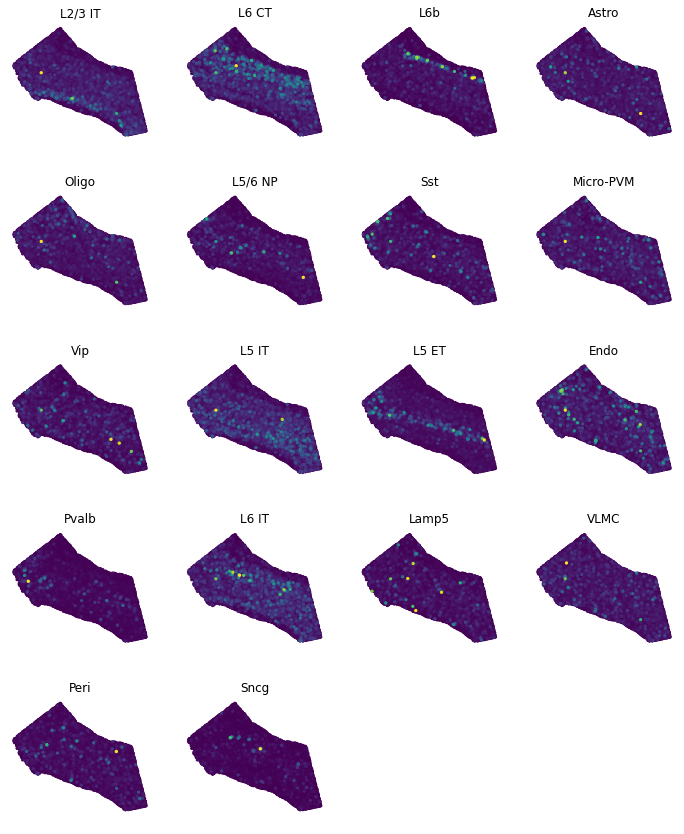

In [3]:
tg.plot_cell_annotation(ad_map, annotation='subclass_label', nrows=5, ncols=4)

- Let's try to get a deeper sense of how good this mapping is. A good helper is `plot_training_scores` which gives us four panels:
    - The first panels is a histogram of the simlarity score for each training gene. Most genes are mapped with very high similarity (> .9) although few of them have score ~.5. We would like to understand why for these genes the score is lower.
    - The second panel shows that there is a neat correlation between the training score of a gene (y-axis) and the sparsity of that gene in the snRNA-seq data (x-axis). Each dot is a training gene. **The trend is that the sparser the gene the higher the score: this usually happens because very sparse gene are easier to map**, as their pattern is matched by placing a few "jackpot cells" in the right spots.
    - The third panel is similar to the second one, but contains the gene sparsity of the spatial data. Spatial data are usually more sparse than single cell data, a discrepancy which is often responsible for low quality mapping.
    - In the last panel, we show **the training scores as a function of the difference in sparsity between the spatial and the single-cell datasets**. For genes with comparable sparsity, the mapped gene expression is very similar to that in the spatial data. However, if a gene is quite sparse in one dataset (typically, the spatial data) but not in other, the mapping score is lower. This occurs as Tangram cannot properly matched the gene pattern because of inconsistent amount of dropouts between the datasets.

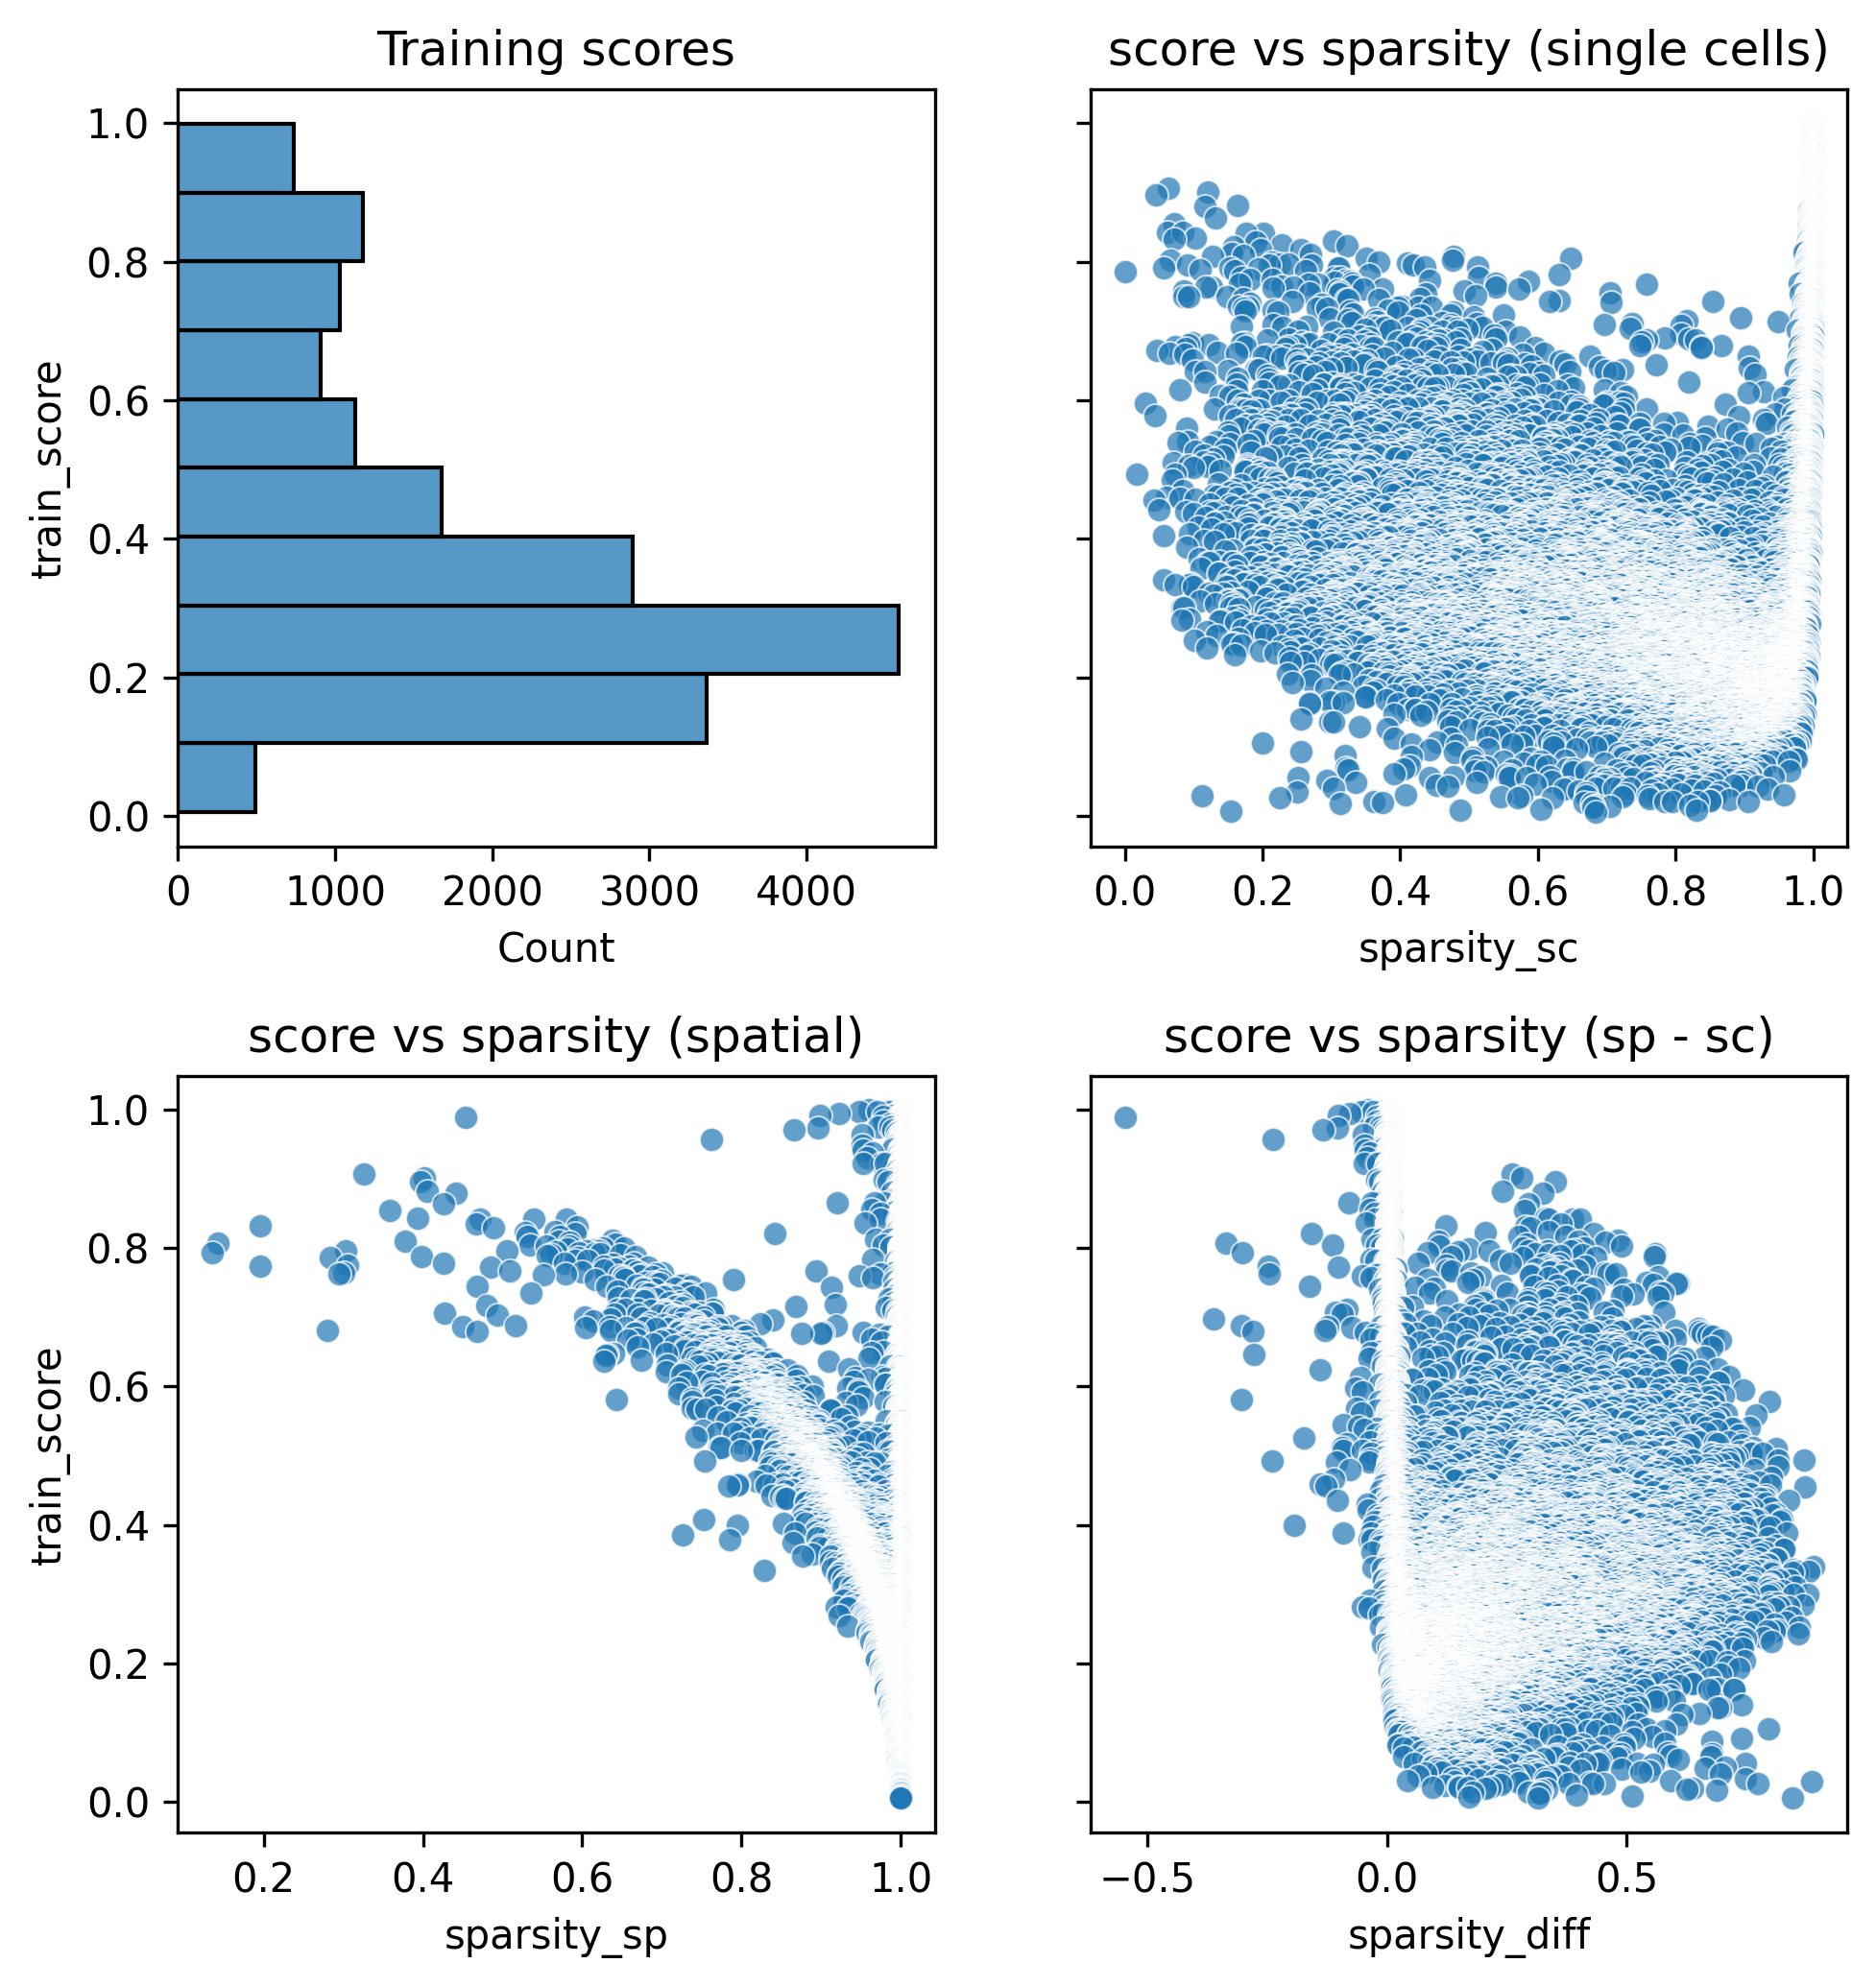

In [3]:
tg.plot_training_scores(ad_map)

- Although the above plots give us a summary of scores at single-gene level, we would need to know _which_ are the genes mapped with low scores.
- These information can be accessed from the dataframe `.uns['train_genes_df']` from the mapping results; this is the dataframe used to build the four plots above.

In [23]:
ad_map.uns['train_genes_df']

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
Igf2,0.999661,0.999924,0.994011,-0.005913
Chodl,0.997068,0.999016,0.999086,0.000070
5031425F14Rik,0.996109,0.998789,0.999594,0.000805
Car3,0.995159,0.999016,0.999695,0.000679
Scgn,0.994771,0.999205,0.999898,0.000693
...,...,...,...,...
Satb2,0.494427,0.455904,0.969549,0.513645
Cdh12,0.460160,0.384889,0.972594,0.587705
Mrgprx2,NaN,0.996444,1.000000,0.003556
Chrna2,NaN,0.996746,1.000000,0.003254


- We want to inspect gene expression of training genes mapped with low scores, to understand the quality of mapping. 
- First, we need to generate "new spatial data" using the mapped single cell: this is done via `project_genes`.
- The function accepts as input a mapping (`adata_map`) and corresponding single cell data (`adata_sc`).
- The result is a voxel-by-gene `AnnData`, formally similar to `ad_sp`, but containing gene expression from the mapped single cell data rather than Slide-seq.

In [24]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc)
ad_ge

AnnData object with n_obs × n_vars = 9852 × 27742
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'x', 'y'
    var: 'is_training'

- **We now choose a few training genes mapped with low score.**

In [25]:
genes = ['Cdh12', 'Satb2', 'Dscaml1']
ad_map.uns['train_genes_df'].loc[genes]

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
Cdh12,0.460160,0.384889,0.972594,0.587705
Satb2,0.494427,0.455904,0.969549,0.513645
Dscaml1,0.529821,0.416291,0.979598,0.563307


- To visualize gene patterns, we use the helper `plot_genes`. This function accepts two voxel-by-gene `AnnData`s: the actual spatial data  (`adata_measured`), and a Tangram spatial prediction (`adata_predicted`). The function returns gene expression maps from the two spatial `AnnData` on the genes `genes`.
- As expected, the predited gene expression is less sparse albeit the main patterns are captured. For these genes, we trust more the mapped gene patterns, as Tangram "corrects" gene expression by aligning in space less sparse data.

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


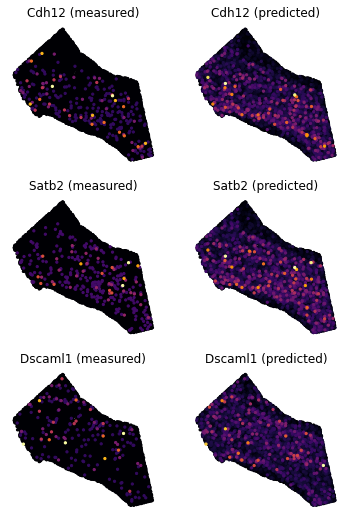

In [26]:
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

- An even stronger example is found in genes that are not detected in the spatial data, but are detected in the single cell data. These genes clearly lower the average mapping score (and should be removed from the training genes), but the mapped patterns give insight on how the spatial patterns look like.

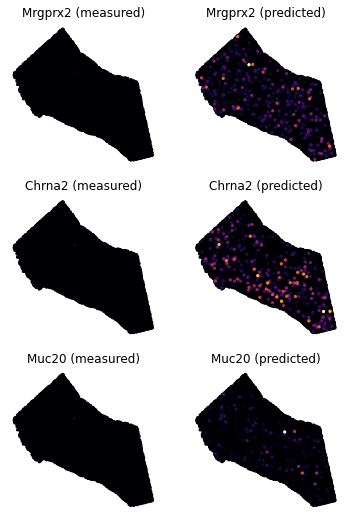

In [27]:
mask = ad_map.uns['train_genes_df'].train_score.isna()
genes = ad_map.uns['train_genes_df'][mask].index.values
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

- So far, we only inspected genes used to align the data (training genes), but the mapped single cell data, `ad_ge` contains the whole transcriptome. That includes 27k test genes.

In [28]:
(ad_ge.var.is_training == False).sum()

27490

- We can use `plot_genes` to inspect gene expression of non training genes. This is an essential step as prediction of gene expression is the how we validate mapping.
- Before doing that, it is convenient to compute the similarity scores of all genes, which can be done by `compare_spatial_geneexp`. This function accepts two spatial `AnnData`s (_ie_ voxel-by-gene), and returns a dataframe with simlarity scores for all genes. Training genes are flagged by the Boolean field `is_training`.

In [29]:
df_all_genes = tg.compare_spatial_geneexp(ad_ge, ad_sp)
df_all_genes

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
./Tangram/tangram/utils.py:155: RuntimeWarning: invalid value encountered in float_scalars
  cos_sims.append((v1 @ v2) / norm_sq)


,score,is_training,sparsity_1,sparsity_2
Igf2,0.997079,True,0.0,0.994011
Scgn,0.990717,True,0.0,0.999898
Th,0.977341,True,0.0,0.998579
Crhr2,0.974911,True,0.0,0.998985
Chat,0.964023,True,0.0,0.999188
...,...,...,...,...
Gm29564,NaN,False,1.0,0.999898
Gm28102,NaN,False,0.0,1.000000
Gstp2,NaN,False,1.0,0.999898
1700092M07Rik,NaN,False,0.0,1.000000


- Let's us plot the scores of the test genes and see how they compare to the training genes. Following the strategy in the previous plots, we visualize the scores as a function of the sparsity of the spatial data.
- (We have not wrapped this call into a function yet).

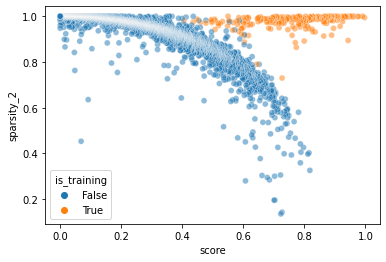

In [30]:
import seaborn as sns
sns.scatterplot(data=df_all_genes, x='score', y='sparsity_2', hue='is_training', alpha=.5);

- **Again, sparser genes in the spatial data are predicted with low scores**, which is due to the presence of dropouts in the spatial data.
- Let's choose a few test genes with varied scores and compared predictions vs measured gene expression.

In [31]:
genes = ['Snap25', 'Atp1b1', 'Atp1a3', 'Ctgf', 'Nefh', 'Aak1', 'Fa2h', ]
df_all_genes.loc[genes]

,score,is_training,sparsity_1,sparsity_2
Snap25,0.815116,False,0.0,0.402253
Atp1b1,0.780715,False,0.0,0.579984
Atp1a3,0.705454,False,0.0,0.658343
Ctgf,0.586787,False,0.0,0.981628
Nefh,0.544894,False,0.0,0.909156
Aak1,0.497858,False,0.0,0.868047
Fa2h,0.359085,False,0.0,0.972493


- We can use again `plot_genes` to visualize gene patterns.
- Interestingly, the agreement for genes `Atp1b1` or `Apt1a3`, seems less good that that for `Ctgf` and `Nefh`, despite the scores are higher for the former genes. This is because even though the latter gene patterns are localized correctly, their expression values are not so well correlated (for instance, in `Ctgf` the "bright yellow spot" is in different part of layer 6b). In contrast, for `Atpb1` the gene expression pattern is largely recover, even though the overall gene expression in the spatial data is more dim.

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


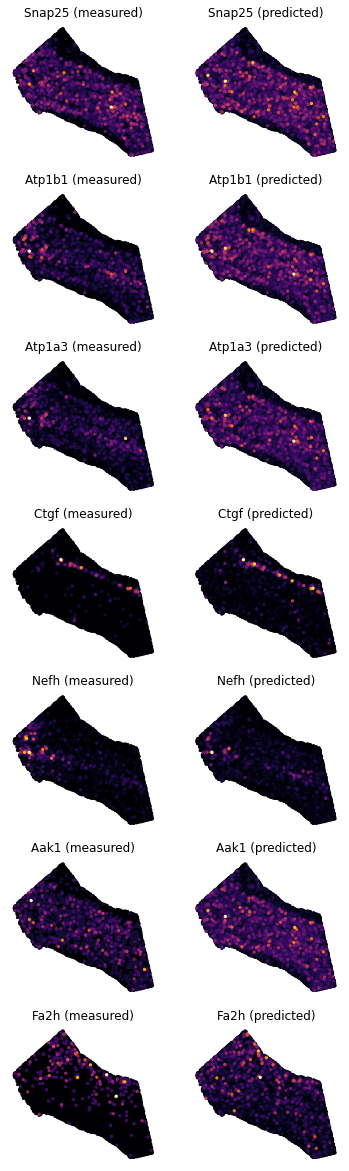

In [32]:
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)